# Extreme Value Analysis

Please refer to the following link for the theory on this topic.

https://tudelft-citg.github.io/HOS-prob-design/intro.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import plotly.graph_objects as go
import itertools
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

- Establish the Peak Over Threshold values.
- Starting point is Hs data in file hsarras=ys POT test.csv with 3 hour Hs data
- Here the Thershold (thresh) is chosen $H_s = 2.5 m$ and the time is 4 (j) * 3 hrs = 12 hrs
- Peaks delivers the POT values over which one should do the Weibull or Gumbel fit

Number of Hs values:  11688



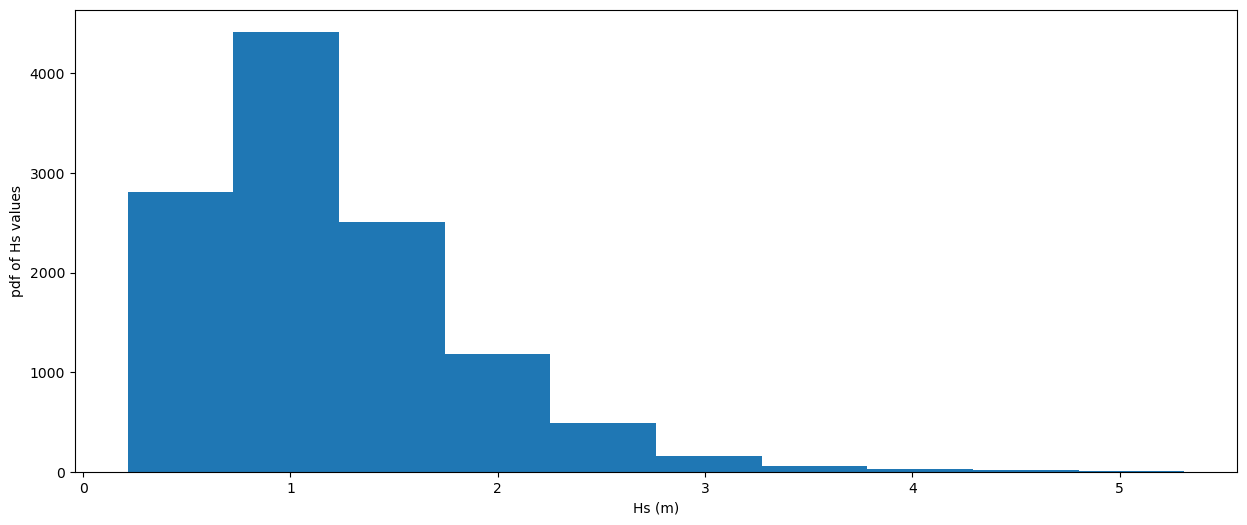

In [2]:
wave_data = pd.read_excel('Hs_definitief.xlsx')
time_series = wave_data['Hs']
# 
#  Extract Hs from database and plot histogram
#

fig, ax = plt.subplots(1, 1)
plt.xlabel('Hs (m)')
plt.ylabel('pdf of Hs values')
ax.hist(time_series, histtype='stepfilled')

#
imax = len(time_series)
print('Number of Hs values: ',imax)
print()
dft = wave_data.get("Extracted time")
pass

Finding the TH value for POT

In [3]:
from dispersion_index import DI_plot

DI_plot(pandas_angle['significant_wave_height_(m)'], pandas_angle['date_&_time'], 72, 0.05)


0.011796137744585522


Text(0.5, 1.0, 'Mean Residual Life Plot')

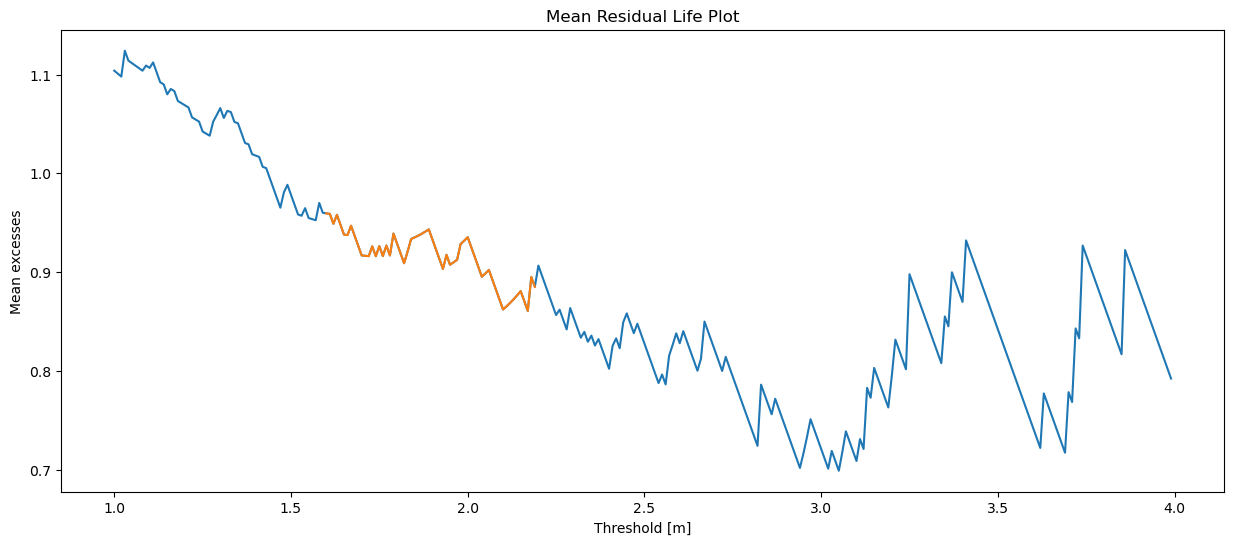

In [7]:
#define parameters
dl = 48 #in hours 
threshold = np.arange(1, 4, 0.01)
mean_excesses = np.zeros(len(threshold))


for i in range(len(threshold)):
    idx_pot, pks = find_peaks(time_series, height = threshold[i], distance = dl) 
    pot_list = time_series.loc[idx_pot]
    excesses = pot_list - threshold[i]
    mean_excesses[i] = np.mean(excesses)
    
ci = 1.96 * np.std(mean_excesses)/np.sqrt(len(mean_excesses))
print(ci)

plt.plot(threshold, mean_excesses)
plt.plot(threshold[60:120], mean_excesses[60:120])
ax.fill_between(threshold, (mean_excesses-ci), (mean_excesses+ci), color='b', alpha=.1)
plt.xlabel('Threshold [m]')
plt.ylabel('Mean excesses')
plt.title('Mean Residual Life Plot')


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t

# Define parameters
dl = 12  # in hours
threshold = np.arange(1, 4, 0.1)
mean_excesses = np.zeros(len(threshold))
n_bootstraps = 1000  # Number of bootstrap samples

# Function to calculate mean excess for a given threshold
def calculate_mean_excess(time_series, threshold):
    idx_pot, pks = find_peaks(time_series, height=threshold, distance=4)
    valid_indices = [idx for idx in idx_pot if idx < len(time_series)]
    pot_list = time_series.iloc[valid_indices]
    excesses = pot_list - threshold
    return np.mean(excesses)

# Bootstrap sampling and calculation of mean excess
bootstrap_samples = np.zeros((n_bootstraps, len(threshold)))
for b in range(n_bootstraps):
    sampled_indices = np.random.choice(len(time_series), len(time_series), replace=True)
    sampled_time_series = time_series.iloc[sampled_indices]
    for i in range(len(threshold)):
        bootstrap_samples[b, i] = calculate_mean_excess(sampled_time_series, threshold[i])

# Calculate mean and standard error of mean excess for each threshold
bootstrap_mean = np.mean(bootstrap_samples, axis=0)
bootstrap_sem = sem(bootstrap_samples, axis=0)

# Calculate t-value for 95% confidence interval
t_value = t.ppf(0.975, n_bootstraps - 1)

# Calculate confidence interval
confidence_interval = t_value * bootstrap_sem

# Plotting
plt.plot(threshold, bootstrap_mean, label='Mean Excess')
plt.fill_between(threshold, bootstrap_mean - confidence_interval, bootstrap_mean + confidence_interval,
                 color='blue', alpha=0.3, label='95% Confidence Interval')
plt.title('Mean Residual Life Plot')
plt.xlabel('Threshold')
plt.ylabel('Mean Excess')
plt.legend()
plt.show()


KeyboardInterrupt: 

## Peak over threshold

In [ ]:
#
# Peak Over Through code
def pot_method(data, threshold, dtime):
    idx_pot, _ = find_peaks(data, height = threshold, distance = dtime)
    pot_list = data.loc[idx_pot]
    return idx_pot, pot_list
#

In [ ]:
fig = go.Figure(data=go.Scatter(
    y = time_series,
    mode = 'lines'
))

fig.show()

In [ ]:
#
# threshold is the Hs threshold value
# dtime is the number of values used in time (here 4 * 3 hour samples = 12 hrs)
#
threshold = 2.0
dtime = 4
tare = threshold #0

indices,pot_maxima = pot_method(time_series, threshold, dtime)

kmax = len(pot_maxima)
print("Number of peaks based on Threshold: ",threshold," and time ",dtime," is ",kmax)
print('Last part of the calculated Peaks over Threshold values: ')
print(pot_maxima.tail())

Number of peaks based on Threshold:  2.0  and time  4  is  226
Last part of the calculated Peaks over Threshold values: 
11658    2.428989
11663    2.175160
11669    2.684036
11676    3.248179
11680    2.535151
Name: Hs, dtype: float64


In [ ]:
#
#
# following is a subsegment to extract part of the data for visualization
# NB: j is starting value op peaks and range is number of points to be visualized
#
sub_ind = []
j = 80
for i in range(0,24):
    k = j + i
    val = indices[k]
    sub_ind.append(val)
#
sub_pot = pot_maxima.loc[sub_ind]

#
# Update numbers based on range!
#
inst = sub_ind[0]
inen = sub_ind[23]
sub_tim = time_series[inst:inen]
sub_pos = list(itertools.chain(range(inst, inen)))
#
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sub_pos,y=sub_tim,
    mode='lines',
    name='Original Plot'
))

#
#
fig.add_trace(go.Scatter(
    x=sub_ind,y=sub_pot,
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

#
pot_time = []
for i in range(0,kmax):
    val = indices[i]
    pot_time.append(dft[val])
#
fig, ax = plt.subplots(1, 1)
plt.xlabel('Hs (m)')
plt.ylabel('pdf of Hs max values')
ax.hist(pot_maxima, histtype='stepfilled')
#
pass

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import xlsxwriter

workbook = xlsxwriter.Workbook('EVA result POT extremes.xlsx')
worksheet = workbook.add_worksheet()

array = [indices, 
         pot_time,
         pot_maxima]

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)

workbook.close()

## Extreme value distributions

In [ ]:
import reliability.Fitters as rf

In [ ]:
dfmax = []
for it in pot_maxima.items():
    val = it[1] - tare # pot_maxima[i]
    dfmax.append(val)    
dfmax.sort()

### Fit Weibull 2P

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 226/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha        0.619355       0.0409033  0.544158  0.704944
     Beta         1.06372       0.0534229  0.963999   1.17375 

Goodness of fit    Value
 Log-likelihood -111.218
           AICc  226.489
            BIC  233.276
             AD  1.19251 



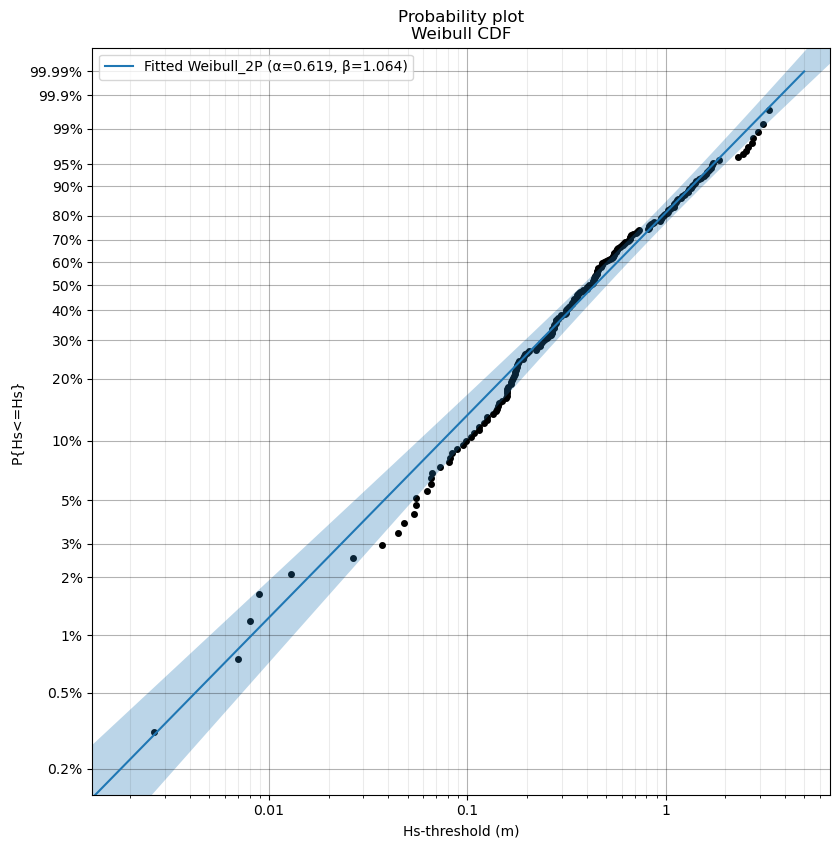

In [ ]:
waw2 = rf.Fit_Weibull_2P(failures=dfmax)
plt.ylabel('P{Hs<=Hs}')
plt.xlabel('Hs-threshold (m)')
plt.show()

### Fit Weibull 3P

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 226/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha        0.619355       0.0409033  0.544158  0.704944
     Beta         1.06372       0.0534229  0.963999   1.17375
    Gamma               0               0         0         0 

Goodness of fit    Value
 Log-likelihood -111.218
           AICc  228.543
            BIC  238.697
             AD  1.19251 



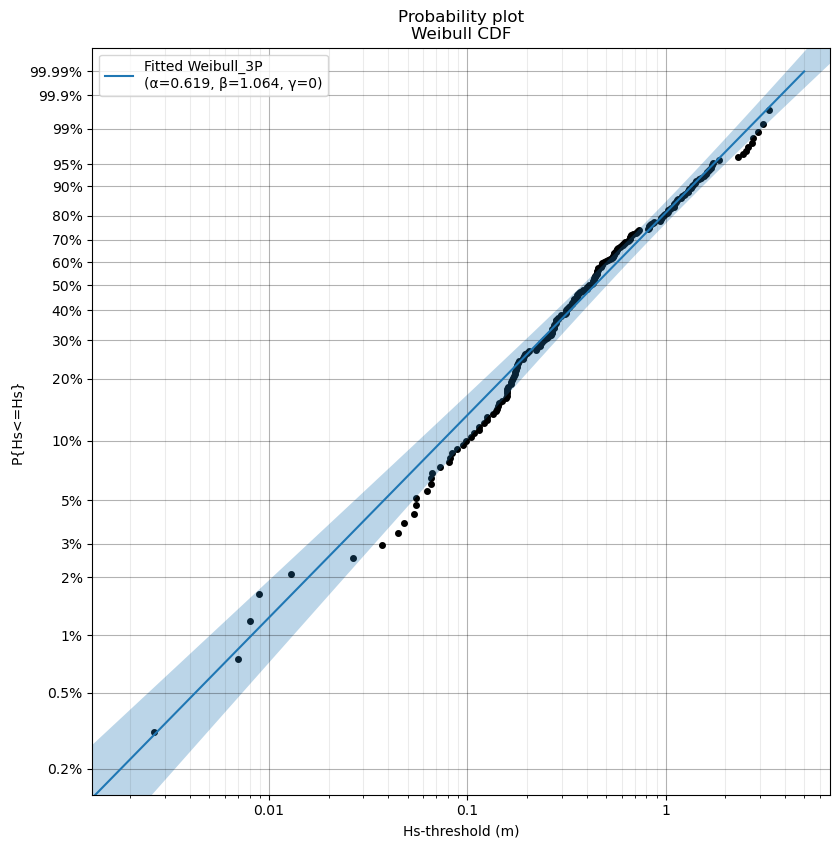

In [ ]:
#
#  Weibull 3P fit delivers alpha = scale factor, beta = shape factor & gamma = location factor

waw3 = rf.Fit_Weibull_3P(failures=dfmax)

plt.ylabel('P{Hs<=Hs}')
plt.xlabel('Hs-threshold (m)')
plt.show()


### Fit Gumbel 2P

Results from Fit_Gumbel_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 226/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu        0.955814       0.0617164  0.834852   1.07678
    Sigma        0.869447       0.0362033  0.801308   0.94338 

Goodness of fit    Value
 Log-likelihood -285.906
           AICc  575.865
            BIC  582.653
             AD  25.6653 



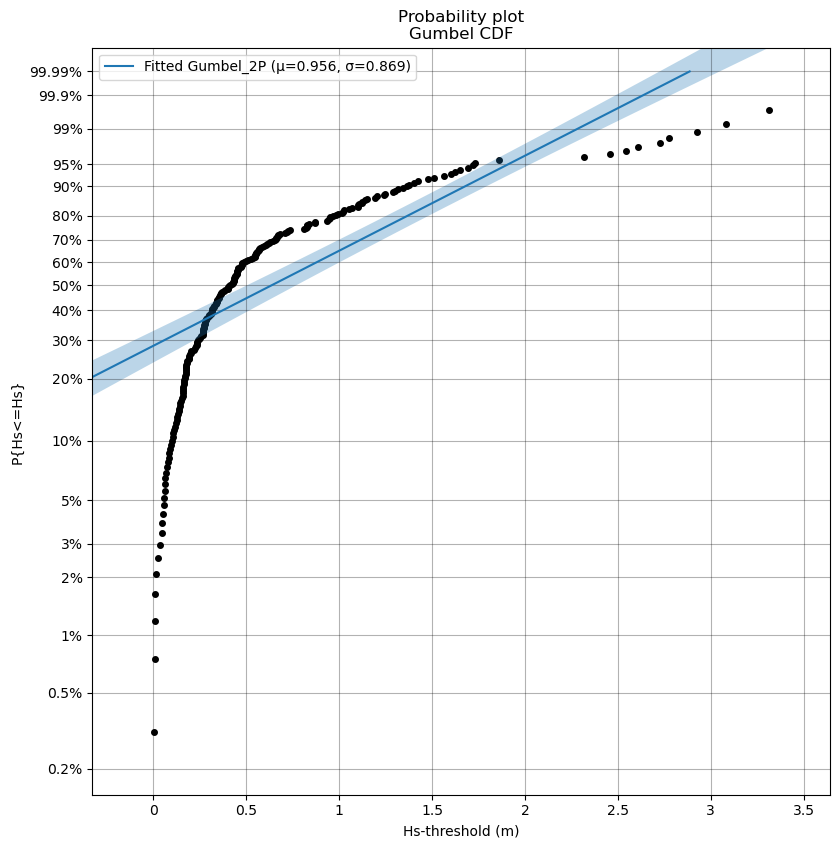

In [ ]:
wag = rf.Fit_Gumbel_2P(failures=dfmax)
plt.ylabel('P{Hs<=Hs}')
plt.xlabel('Hs-threshold (m)')
plt.show()

### Fit Exponential 2P

Results from Fit_Exponential_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 226/0 (0% right censored) 

Parameter  Point Estimate  Standard Error   Lower CI   Upper CI
   Lambda         1.66338        0.110646    1.46006    1.89501
 1/Lambda        0.601186       0.0399903   0.527701   0.684905
    Gamma      0.00252988               0 0.00252988 0.00252988 

Goodness of fit   Value
 Log-likelihood    -111
           AICc 226.053
            BIC 232.841
             AD 1.42454 



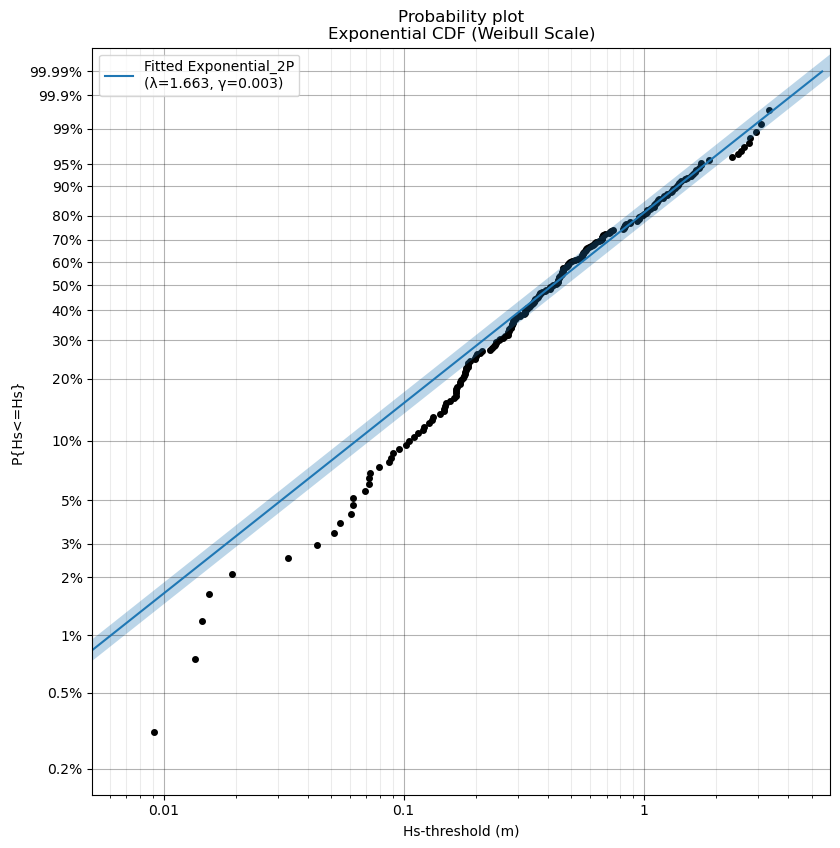

In [ ]:
wae = rf.Fit_Exponential_2P(failures=dfmax)
plt.ylabel('P{Hs<=Hs}')
plt.xlabel('Hs-threshold (m)')
plt.show()

## Calculation of 100 year return wave

In [ ]:
#
#  Determine return period values
#
#
# define exceedance value for 100 yr return
# 
treturn = 100
numberyears = 6
numb = len(pot_maxima) / numberyears
#prob = 1 - 1/(numb * treturn)
prob = 0.66
print(prob)

0.66


In [ ]:
# Weibull 2
X_lower,X_point,X_upper = waw2.distribution.CDF(CI_type='time',CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Weibull2P ',treturn,'Year return value is ',X_point,' (m)')

# Weibull 3
X_lower,X_point,X_upper = waw3.distribution.CDF(CI_type='time',CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Weibull3P ',treturn,'Year return value is ',X_point,' (m)')

# Gumbel
X_lower,X_point,X_upper = wag.distribution.CDF(CI_type='time',CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Gumbel ',treturn,'Year return value is ',X_point,' (m)')

# Exponential
X_lower,X_point,X_upper = wae.distribution.CDF(CI_y=prob,show_plot=False)
X_point = X_point + tare
print('Exponential ',treturn,'Year return value is ',X_point,' (m)')

Weibull2P  100 Year return value is  2.6651370678373216  (m)
Weibull3P  100 Year return value is  2.6651370678373216  (m)
Gumbel  100 Year return value is  3.021768761557881  (m)
Exponential  100 Year return value is  2.6510953198880247  (m)


## Compare all  distributions

In [ ]:
results = rf.Fit_Everything(failures=dfmax)  # fit all the models
print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)

NameError: name 'rf' is not defined